In [37]:
import pandas as pd
ad=pd.read_csv("Advertising.csv")
df=ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [38]:
df.drop(columns="Unnamed: 0",inplace=True)#=usecols=[1,2,3,4] işleminin csv den sonra yazınca unnamed degişkenini okumaz.


In [39]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [44]:
df.isnull().values.any()

False

In [45]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [46]:
import seaborn as sns

C:\Users\alper\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


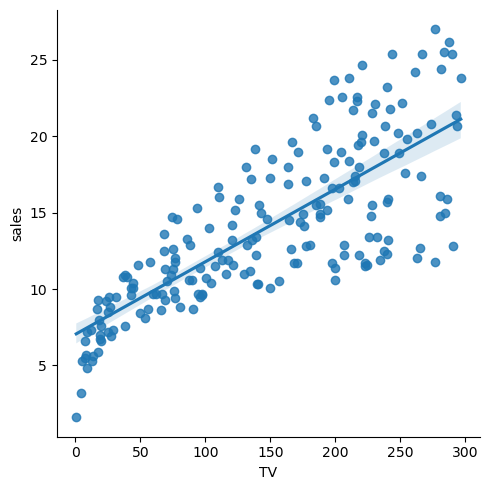

In [50]:
sns.lmplot(x="TV",y="sales",data=df)

C:\Users\alper\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


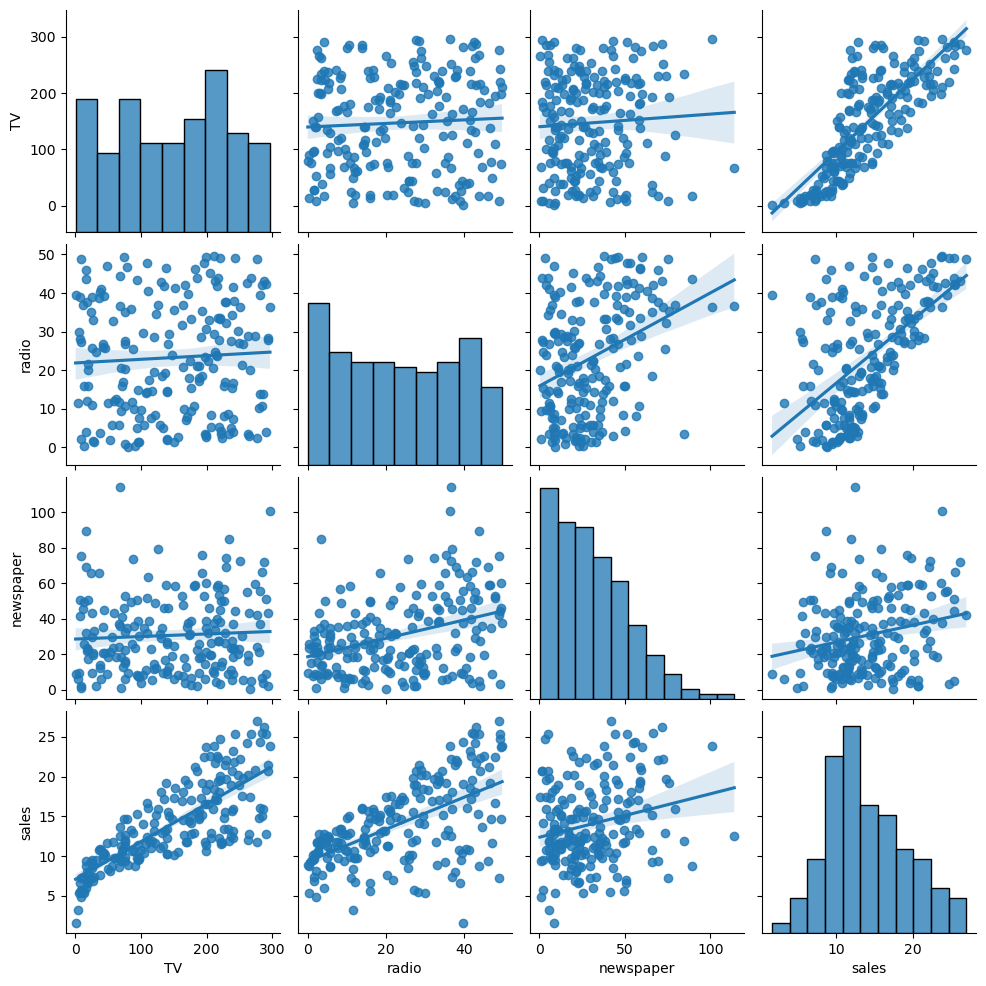

In [51]:
sns.pairplot(df,kind="reg")

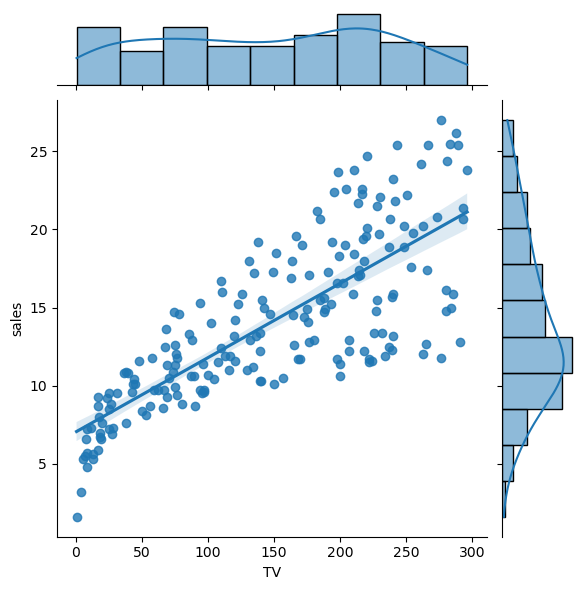

In [54]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg")

# Statsmodels ile modelleme

In [56]:
import statsmodels.api as sm

In [57]:
x=df[["TV"]]
x[0:5]
#dogrusal regrasyonun x degişkenini(bagımsız degişkeni) aldık

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [58]:
x=sm.add_constant(x)
#matris degişkeni için 1 degerlerinden oluşan yeni degişken ekledik

In [59]:
x[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [60]:
y=df[["sales"]]
y[0:5]
 #dogrusal regrasyon için y degilkenini(bagımlı degişkeni) aldık

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [61]:
lm=sm.OLS(y,x)# model kurma işlemi gerçekleşti y bagımlı x bagımsız degişken

In [62]:
model=lm.fit()
#modeli fit etme işlemi gerçekleştirdik

In [64]:
model.summary()
#modelin özellikleri

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.47e-42
Time:                        11:46:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dep. Variable=bagımlı degişkeni gösterir

Model:	OLS =kurulan model çeşidini gösterir

Method:	Least Squares	=en üçük kareler degeri

R Squares	= bagımsız degişkenin bagımlı degişkeni açıklama başarısıdır.Elimdeki TV degişkeni satış degişkenini %60 açıklamaktadır

Adj. R-squared:	=düzeltilmiş r kare degişkeni r kare degerinden daha iyi bir açıklayıcıdır. çünkü ne kadar deişken eklenirse r kare degeri büyür.

F-statistic:test istakislik degerini verir anlamlığı açıklar.

(prob)F-statistic:pi value degerinin kendisidir.

coef:7.03 b0 degeridir. 0.0475 b1 degerini temsil eder.

P>|t|= p value degerinin test istatisliğinin anlamlılıgını açıklar.kat sayıların anlamlılıgını açıklar.


In [67]:
#farklı model kurma yöntemi
import statsmodels.formula.api as smf
lm2=smf.ols("sales ~ TV",df)
model2=lm2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.47e-42
Time:                        12:06:25   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model.params
#b0 ve b1 degerlerini verir.

const    7.032594
TV       0.047537
dtype: float64

In [70]:
model.summary().tables[1]
#model tablosunun 1.bölümünü geetirir.

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [71]:
model.conf_int()
#katsayıların güven aralıgı

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [72]:
model.f_pvalue
#modelin p value istatiksel degeri

1.467389700194647e-42

In [73]:
model.mse_model
#hata kareler ortalaması

3314.618166868649

In [74]:
model.rsquared
#model r kare degeri

0.611875050850071

In [75]:
model.fittedvalues[0:5]
#modelin tahmin edilen ilk 5 degeri

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [76]:
y[0:5]
#modelin gerçek degerleri

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [95]:
 print("Sales=" + str("%.2f" % model.params[0]) + " + TV " + "*" + str("%.2f" % model.params[1]))
    #modelin denkleminin gösterimi

Sales=7.03 + TV *0.05


In [99]:
g=sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={'color':'r','s':9})
g.set_title("model denklemi: Sales=7.03 + TV*0.05")
g.set_ylabel("satış sayısı")
g.set_xlabel("TV harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

In [102]:
from sklearn.linear_model import LinearRegression

In [104]:
x=df[["TV"]]
y=df[["sales"]]
reg=LinearRegression()
model=reg.fit(x,y)

In [105]:
model.intercept_

array([7.03259355])

In [106]:
model.coef_

array([[0.04753664]])

In [107]:
model.score(x,y)
#r kare degeri

0.611875050850071

In [108]:
model.predict(x)[0:10]
#tahmin edilen degerler

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])